In [21]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement jupyter-notebook>=7.0.0 (from versions: none)
ERROR: No matching distribution found for jupyter-notebook>=7.0.0

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('C:/Users/baofr/Downloads/bienetre.csv')


In [12]:
# Afficher les premières lignes pour vérifier
print(df.head())

   target        age      taille      poids       revenu  experience  \
0       1  76.378818  172.472900  93.637574  2317.284189   23.187146   
1       1  39.629339  162.527782  88.071856  2740.909189   26.742305   
2       0  36.506832  196.457696  85.160759  3541.036636   20.895824   
3       1  50.016190  174.829299  72.362368  3093.794975   26.155986   
4       1  60.743330  171.536491  54.874865  2113.805284   14.771488   

   education        imc    stress  nb_enfants  ...  exercice  alimentation  \
0   2.524067  24.544095  5.805570         1.0  ...       4.0      6.128322   
1   3.136856  26.805875  3.970287         1.0  ...       1.0      6.068320   
2   4.282662  24.218407  2.312967         0.0  ...       3.0      6.503321   
3   3.007974  23.452811  5.387465         0.0  ...       3.0      6.015851   
4   2.780533  26.065223  6.859302         1.0  ...       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0  7.656376  129.058650

In [13]:
# Informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        10000 non-null  int64  
 1   age           10000 non-null  float64
 2   taille        10000 non-null  float64
 3   poids         10000 non-null  float64
 4   revenu        10000 non-null  float64
 5   experience    10000 non-null  float64
 6   education     10000 non-null  float64
 7   imc           10000 non-null  float64
 8   stress        10000 non-null  float64
 9   nb_enfants    10000 non-null  float64
 10  depenses      10000 non-null  float64
 11  exercice      10000 non-null  float64
 12  alimentation  10000 non-null  float64
 13  sommeil       10000 non-null  float64
 14  pression      10000 non-null  float64
 15  cholesterol   10000 non-null  float64
 16  activite      10000 non-null  float64
 17  satisfaction  10000 non-null  float64
 18  risque        10000 non-nul

In [14]:
# Statistiques descriptives
print(df.describe())

             target           age        taille         poids        revenu  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.800000     47.978640    170.535341     74.042819   2796.214262   
std        0.748369     12.457695     10.114769     13.341103    781.533488   
min        0.000000      7.587327    129.436247     31.449135    275.978543   
25%        0.000000     39.405573    163.740683     64.729830   2204.563230   
50%        1.000000     47.619796    170.490729     73.192735   2757.064229   
75%        1.000000     56.637883    177.275880     82.251508   3381.817122   
max        2.000000     93.773829    214.790843    140.374368   5363.916672   

         experience     education           imc        stress    nb_enfants  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      19.032658      3.299494     25.621232      4.598669      1.836000   
std        6.242550      0.779620      3.380089    

In [15]:
df = pd.read_csv('C:/Users/baofr/Downloads/bienetre.csv',
                 sep=';',                   # Si le séparateur est différent de la virgule
                 decimal=',',               # Pour les décimales avec virgule (format européen)
                 encoding='utf-8',          # Pour spécifier l'encodage
                 header=0,                  # Ligne d'en-tête (0 = première ligne)
                 na_values=['NA', 'N/A'],   # Valeurs à considérer comme NaN
                 index_col=0)               # Utiliser la première colonne comme index

   target        age      taille      poids       revenu  experience  \
0       1  76.378818  172.472900  93.637574  2317.284189   23.187146   
1       1  39.629339  162.527782  88.071856  2740.909189   26.742305   
2       0  36.506832  196.457696  85.160759  3541.036636   20.895824   
3       1  50.016190  174.829299  72.362368  3093.794975   26.155986   
4       1  60.743330  171.536491  54.874865  2113.805284   14.771488   

   education        imc    stress  nb_enfants  ...  exercice  alimentation  \
0   2.524067  24.544095  5.805570         1.0  ...       4.0      6.128322   
1   3.136856  26.805875  3.970287         1.0  ...       1.0      6.068320   
2   4.282662  24.218407  2.312967         0.0  ...       3.0      6.503321   
3   3.007974  23.452811  5.387465         0.0  ...       3.0      6.015851   
4   2.780533  26.065223  6.859302         1.0  ...       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0  7.656376  129.058650

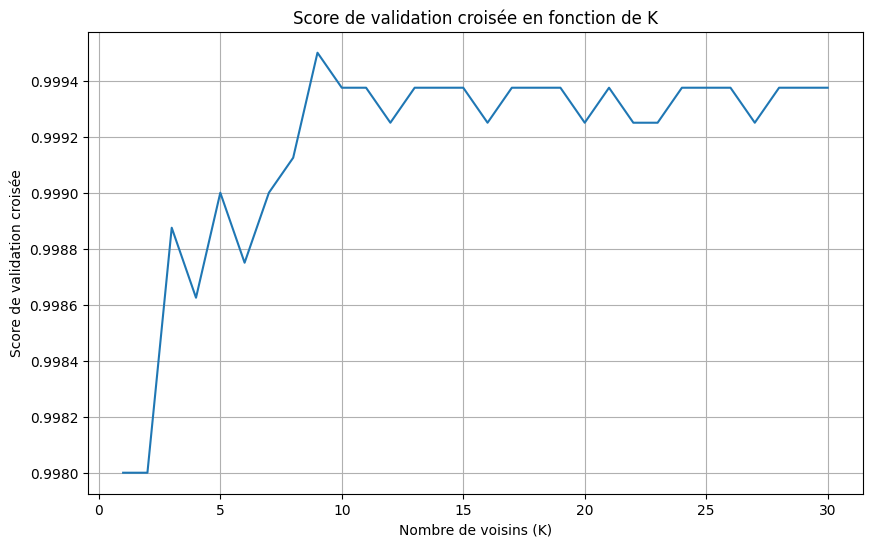

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Charger le fichier CSV

df = pd.read_csv('C:/Users/baofr/Downloads/bienetre.csv')

# Vérification des données
print(df.head())
print(df.columns)

# Séparer les features et la cible
# Utilisons 'target' comme variable cible
X = df.drop('target', axis=1)
y = df['target']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir la grille de paramètres à tester
param_grid = {'n_neighbors': np.arange(1, 31)}

# Créer le modèle KNN
knn = KNeighborsClassifier()

# Configurer GridSearchCV avec validation croisée
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Exécuter la recherche par grille
grid_search.fit(X_train_scaled, y_train)

# Afficher les résultats
print("Meilleure valeur de K:", grid_search.best_params_)
print("Meilleur score de validation croisée:", grid_search.best_score_)

# Évaluer le modèle avec la meilleure valeur de K sur l'ensemble de test
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Afficher les performances du modèle
print("\nRapport de classification sur l'ensemble de test:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Visualiser les scores pour les différentes valeurs de K
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'])
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Score de validation croisée')
plt.title('Score de validation croisée en fonction de K')
plt.grid(True)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Remplacer KNeighborsClassifier par KNeighborsRegressor
knn = KNeighborsRegressor()

# Changer la métrique d'évaluation pour une tâche de régression
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5,
    scoring='r2',  # ou 'neg_mean_squared_error' ou 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=1
)

# Le rapport de classification et la matrice de confusion ne sont pas adaptés à la régression
# Les remplacer par des métriques de régression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Évaluation du modèle
y_pred = best_knn.predict(X_test_scaled)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.999128288097297
MSE: 0.0005
RMSE: 0.022360679774997897
MAE: 0.0005
